In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
CA = pd.read_csv('fit_CA.csv')
MA = pd.read_csv('fit_MA.csv')
TX = pd.read_csv('fit_TX.csv')
FL = pd.read_csv('fit_FL.csv')
WA = pd.read_csv('fit_WA.csv')
NY = pd.read_csv('fit_NY.csv')
AL = pd.read_csv('fit_AL.csv')
IL = pd.read_csv('fit_IL.csv')

In [885]:
data = FL

In [886]:
data['case_diff'] = data['case'].diff().fillna(0)
data['death_diff'] = data['death'].diff().fillna(0)

In [887]:
data

,Unnamed: 0,date,state,death,case,hosp,case_diff,death_diff
0,0,2021/11/21,FL,61081,3679548,140.0,0.0,0.0
1,1,2021/11/22,FL,61147,3681204,158.0,1656.0,66.0
2,2,2021/11/23,FL,61147,3682809,177.0,1605.0,0.0
3,3,2021/11/24,FL,61147,3684332,161.0,1523.0,0.0
4,4,2021/11/25,FL,61147,3684332,146.0,0.0,0.0
...,...,...,...,...,...,...,...,...
107,107,2022/03/08,FL,71326,5820320,226.0,1588.0,0.0
108,108,2022/03/09,FL,71397,5821833,196.0,1513.0,71.0
109,109,2022/03/10,FL,71474,5823350,173.0,1517.0,77.0
110,110,2022/03/11,FL,71860,5824728,147.0,1378.0,386.0


In [891]:
cases = data['case_diff'].to_numpy()
deaths = data['death_diff'].to_numpy()
hosp = data['hosp'].to_numpy()

In [892]:
case_avg = np.zeros([105, ])
death_avg = np.zeros([105, ])
hosp_avg = np.zeros([105, ])
for i in range(105):
    case_avg[i] = np.mean(cases[i:i+7])
    death_avg[i] = np.mean(deaths[i:i+7])
    hosp_avg[i] = np.mean(hosp[i:i+7])

In [893]:
def cum_to_active(Ic):
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [894]:
primary_series = pd.read_csv('prim_FL_1.csv', delimiter = ',')
booster_1 = pd.read_csv('boost_1_FL_1.csv', delimiter = ',')

In [898]:
def choose_pop(state):
    data_dem = np.zeros([6, ])
    if (state == 'TX'):
        data_dem = [2402562.5, 3363587.5, 1922050, 11769652.631578948, 5174047.368421053, 3654400]
    if (state == 'FL'):
        date_dem = [1367718.75, 1914806.25, 1094175, 7937705.263157895, 4250794.736842105,  4426900]
    if (state == 'MA'):
        data_dem = [435062.5, 609087.5, 348050, 2731978.9473684207, 1390721.0526315789, 1135900]
    if (state == 'CA'):
        data_dem = [2866031.25, 4012443.75, 2292825, 16309168.421052631, 7423231.578947368, 5739000]
    if (state == 'NY'):    
        date_dem = [1283750.0, 1797250.0, 1027000, 7744300.0, 3855700.0, 3200300]
        print(date_dem)
    if (state == 'AL'):    
        date_dem = [352531.25, 493543.75, 282025, 1844747.3684210526, 959552.6315789474, 834700]
    if (state == 'WA'):    
        date_dem = [533468.75, 746856.25, 426775, 3067921.052631579, 1461078.9473684211, 1187800]
    if (state == 'IL'):    
        date_dem = [914250.0, 1279950.0, 731400, 4979731.578947368, 2475768.4210526315, 1981300]
    return date_dem

In [899]:
data_dem = choose_pop('FL')

In [900]:
Ni, N = data_dem, np.sum(data_dem)

In [901]:
Ni

[1367718.75,
 1914806.25,
 1094175,
 7937705.263157895,
 4250794.736842105,
 4426900]

In [902]:
vacc_1 = np.zeros([6, 494])
vacc_2 = np.zeros([6, 494])
vacc_3 = np.zeros([6, 494])

vacc_1[1,:] = primary_series['5_11_diff'].to_numpy()/data_dem[1]
vacc_1[2,:] = primary_series['12_18_diff'].to_numpy()/data_dem[2]
vacc_1[3,:] = primary_series['19_49_diff'].to_numpy()/data_dem[3]
vacc_1[4,:] = primary_series['50_64_diff'].to_numpy()/data_dem[4]
vacc_1[5,:] = primary_series['65_diff'].to_numpy()/data_dem[5]


vacc_2[3,:] = booster_1['19_49_diff'].to_numpy()/data_dem[3]
vacc_2[4,:] = booster_1['50_64_diff'].to_numpy()/data_dem[4]
vacc_2[5,:] = booster_1['65_diff'].to_numpy()/data_dem[5]

vacc_2[3,121] = vacc_2[3, 120]
vacc_2[4,121] = vacc_2[4, 120]
vacc_2[5,121] = vacc_2[5, 120]


In [903]:
CM_all = np.genfromtxt('files\\CMs\\CM_All.txt')
CM_s = np.genfromtxt('files\\CMs\\CM_s.txt')
CM_w = np.genfromtxt('files\\CMs\\CM_w.txt')

In [904]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [905]:
cal = pd.read_excel('vax\calend.xlsx')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [906]:
g_E = 1/(1.5)
g_Recovery = 1/15
g_inf = 1/7
g_hosp = 1/10
g_em = 1/15
q = 2/3

In [588]:
hosp_data = np.genfromtxt('files\\hosp2.csv', delimiter=';')

In [589]:
prev2 = pd.read_excel('prev_US_Jan21.xlsx')
prev2 = prev2['prev'].to_numpy()

In [590]:
prev3 = pd.read_csv('varX.csv', sep = ';')
prev3= prev3['comp'].to_numpy()

In [591]:
prev2 = prev2[30:838]

In [660]:
inf = pd.read_excel('vax\\influx2.xlsx')

In [593]:
infl = inf.to_numpy()

In [66]:
def sim_beta(x, x0, x01, x02, x03, x04, x1, x2, x3):
    Nd = 112
    dt = 0.25  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = np.zeros([6, ])
    M2 = np.zeros([6, ])
    M3 = np.zeros([6, ])
    M22 = np.zeros([6, ])
    MX = np.zeros([6, ])
    
    Mh = np.zeros([6, ])
    Mh2 = np.zeros([6, ])
    Mh3 = np.zeros([6, ])
    Mh22 = np.zeros([6, ])
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
        
    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w1 = 0.9/(4*30)
        w11 = 0.9/(4*30)
        w3 = 0.9/(4*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w1 = 0.5/(10*30)
        w11 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        
    
    D0 = [149/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):

        if (count < 440):
            if (sc1 == 0):
                prev = 0
            else:    
                prev = prev2[count]
                
        prevv = prev3[count]
            
        if (tt*dt < 21):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 21 and tt*dt < 41):
            bita = x01/N
            yx = y1 + (tt*dt-21)*(y2 - y1)/30
            zx = z1 + (tt*dt-21)*(z2 - z1)/30

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20        
            
        if (tt*dt >= 81 and tt*dt < 112):
            bita = x04/N
            yx = y4 + (tt*dt-81)*(y5 - y4)/20
            zx = z4 + (tt*dt-81)*(z5 - z4)/20       
          
        if (tt*dt >= 112):
            sigma = 0.00
            
            x4 = 2*(x04)

            x4 = x4 + np.random.normal(0, std, 1)
            if (sc1 ==0):
                bita = (1+0.0)*x4/N
                pp = 1
            if (sc1 ==1):
                bita = (1+prev*0.55)*x4/N
                pp = 1.55
            if (sc1 ==2):
                bita = (1+prev*0.5)*x4/N
                pp = 1.5
            if (sc1 == 3):
                bita = x4/N
                pp = 1
            if (sc1 == 4):
                bita = (1 - prev*0.2)*x4/N
                pp = 0.8
            #yx = (y3 + y4 + y5 + y2)/4
            yx = 1.5*y5
            #yx = y5
            #zx = 1*z5    
            zx = 1*z5
            
           
        pp = 0     
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        if (sc1 == 0):
            esc = 0.0
            esc2 = 0.0       
        if (sc1 == 1):
            esc = 0.45
            esc2 = 0.32
        if (sc1 == 2):
            esc = 0.10
            esc2 = 0.0
        if (sc1 == 3):
            esc = 0.85
            esc2 = 0.32  
        if (sc1 == 4):
            esc = 0.5
            esc2 = 0.0  
            
        esc3 = 0.3
            
        yx = yx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        KK1_1 = 3*(1-prev*esc)
        KK2_1 = 18*(1-prev*esc2)*(1- prev*12.34/18)
        KK3_1 = 38*(1-prev*esc2)*(1- prev*(38-12.33)/38)
        KK1_2 = 1.3333*(1-prev*esc)
        KK2_2 = 8*(1-prev*esc2)*(1- prev*(8-5.66)/8)
        KK3_2 = 18*(1-prev*esc2)*(1- prev*(18-12.33)/18)

        Kex = 0.25*(1-prev*esc)
        Kex2 = 0.35*(1-prev*esc)      
        Kex4 = 0.35*(1-prev*esc)

        K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
        K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
        K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death   

        if (sc2 == 1):
            Kex3 = 0.35*(1-(1-prev)*esc)
            K1_1 = 4*(1-(1-prev)*esc)
            K2_1 = 19*(1-(1-prev)*esc2)
            K3_1 = 38*(1-(1-prev)*(esc2-0.1))
            K1_2 = 4*(1-(1-prev)*esc)
            K2_2 = 19*(1-(1-prev)*esc2)
            K3_2 = 38*(1-(1-prev)*(esc2-0.1))
            KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
            KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
            KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
            
            
        else:
            Kex3 = 0.20*(1-(1-prev)*esc)
            K1_1 = 2*(1-(1-prev)*esc)
            K2_1 = 9*(1-(1-prev)*esc2)
            K3_1 = 19*(1-(1-prev)*(esc2-0.1))
            K1_2 = 2*(1-(1-prev)*esc)
            K2_2 = 9*(1-(1-prev)*esc2)
            K3_2 = 19*(1-(1-prev)*(esc2-0.1))
            KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
            KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
            KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
            
                     
        KKK1_1 = 4*(1-prev*esc)
        KKK2_1 = 19*(1-prev*esc2)
        KKK3_1 = 4*(1-prev*(esc2-0.1))
        KKK1_2 = 19*(1-prev*esc)
        KKK2_2 = 19*(1-prev*esc2)
        KKK3_2 = 38*(1-prev*(esc2-0.1))

        KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
        KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
        KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Kex*M[i]*g_E + 0.25*M22[i]*g_E  + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Kex2*M[i]*g_E + 0.25*M22[i]*g_E + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex2*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                
                S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - infl[count]*N/(329e6) + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + infl[count]*N/(329e6) - g_E*E[i])  + E_g
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*MXh[i] + KK2[i]*Mh2[i] + KKK2[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        M_new[i] = M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) + M_g
                        M22_new[i] = M22[i] + dt*(- w11*M22[i] + k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        M3_new[i] = M3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev)*esc)) - w2*M3[i]) + M3_g
                        M2_new[i] = M2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]) - w3*M2[i]) + M2_g
                        MX_new[i] = MX[i] + dt*(k3*prev*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc)*(1-prevv*esc3) + 0.5*KM*M2[i]*(1-prevv*esc3) + 0.5*KM*MX[i]) - w3*MX[i]) + M2_g
                        
                        
                        Mh_new[i] = Mh[i] + dt*(k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i]))
                        Mh22_new[i] = Mh22[i] + dt*(k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        Mh3_new[i] = Mh3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev)*esc)))
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*Mh[i]*(1-prev*esc) + KM*Mh3[i]*(1-prev*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i])) 
                        MXh_new[i] = MXh[i] + dt*(k3*prev*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]))

        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = M[i]*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(M)
            M2_ovv[count] = np.sum(M2)
            M3_ovv[count] = np.sum(M3)
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([88, ])
    H_ov_avg = np.zeros([12, ])
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        
    return I_ov_avg

In [67]:
def sim_hosp(x, y0, y1, y2, y3, y4, y5, y6):
    Nd = 112
    dt = 0.25  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = np.zeros([6, ])
    M2 = np.zeros([6, ])
    M3 = np.zeros([6, ])
    M22 = np.zeros([6, ])
    MX = np.zeros([6, ])
    
    Mh = np.zeros([6, ])
    Mh2 = np.zeros([6, ])
    Mh3 = np.zeros([6, ])
    Mh22 = np.zeros([6, ])
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
        
    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w1 = 0.9/(4*30)
        w11 = 0.9/(4*30)
        w3 = 0.9/(4*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w1 = 0.5/(10*30)
        w11 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        
    
    D0 = [149/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):

        if (count < 440):
            if (sc1 == 0):
                prev = 0
            else:    
                prev = prev2[count]
                
        prevv = prev3[count]
            
        if (tt*dt < 21):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 21 and tt*dt < 41):
            bita = x01/N
            yx = y1 + (tt*dt-21)*(y2 - y1)/30
            zx = z1 + (tt*dt-21)*(z2 - z1)/30

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20        
            
        if (tt*dt >= 81 and tt*dt < 112):
            bita = x04/N
            yx = y4 + (tt*dt-81)*(y5 - y4)/20
            zx = z4 + (tt*dt-81)*(z5 - z4)/20       
          
        if (tt*dt >= 112):
            sigma = 0.00
            
            x4 = 2*(x04)

            x4 = x4 + np.random.normal(0, std, 1)
            if (sc1 ==0):
                bita = (1+0.0)*x4/N
                pp = 1
            if (sc1 ==1):
                bita = (1+prev*0.55)*x4/N
                pp = 1.55
            if (sc1 ==2):
                bita = (1+prev*0.5)*x4/N
                pp = 1.5
            if (sc1 == 3):
                bita = x4/N
                pp = 1
            if (sc1 == 4):
                bita = (1 - prev*0.2)*x4/N
                pp = 0.8
            #yx = (y3 + y4 + y5 + y2)/4
            yx = 1.5*y5
            #yx = y5
            #zx = 1*z5    
            zx = 1*z5
            
           
        pp = 0     
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        if (sc1 == 0):
            esc = 0.0
            esc2 = 0.0       
        if (sc1 == 1):
            esc = 0.45
            esc2 = 0.32
        if (sc1 == 2):
            esc = 0.10
            esc2 = 0.0
        if (sc1 == 3):
            esc = 0.85
            esc2 = 0.32  
        if (sc1 == 4):
            esc = 0.5
            esc2 = 0.0  
            
        esc3 = 0.3
            
        yx = yx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        KK1_1 = 3*(1-prev*esc)
        KK2_1 = 18*(1-prev*esc2)*(1- prev*12.34/18)
        KK3_1 = 38*(1-prev*esc2)*(1- prev*(38-12.33)/38)
        KK1_2 = 1.3333*(1-prev*esc)
        KK2_2 = 8*(1-prev*esc2)*(1- prev*(8-5.66)/8)
        KK3_2 = 18*(1-prev*esc2)*(1- prev*(18-12.33)/18)

        Kex = 0.25*(1-prev*esc)
        Kex2 = 0.35*(1-prev*esc)      
        Kex4 = 0.35*(1-prev*esc)

        K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
        K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
        K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death   

        if (sc2 == 1):
            Kex3 = 0.35*(1-(1-prev)*esc)
            K1_1 = 4*(1-(1-prev)*esc)
            K2_1 = 19*(1-(1-prev)*esc2)
            K3_1 = 38*(1-(1-prev)*(esc2-0.1))
            K1_2 = 4*(1-(1-prev)*esc)
            K2_2 = 19*(1-(1-prev)*esc2)
            K3_2 = 38*(1-(1-prev)*(esc2-0.1))
            KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
            KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
            KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
            
            
        else:
            Kex3 = 0.20*(1-(1-prev)*esc)
            K1_1 = 2*(1-(1-prev)*esc)
            K2_1 = 9*(1-(1-prev)*esc2)
            K3_1 = 19*(1-(1-prev)*(esc2-0.1))
            K1_2 = 2*(1-(1-prev)*esc)
            K2_2 = 9*(1-(1-prev)*esc2)
            K3_2 = 19*(1-(1-prev)*(esc2-0.1))
            KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
            KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
            KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
            
                     
        KKK1_1 = 4*(1-prev*esc)
        KKK2_1 = 19*(1-prev*esc2)
        KKK3_1 = 4*(1-prev*(esc2-0.1))
        KKK1_2 = 19*(1-prev*esc)
        KKK2_2 = 19*(1-prev*esc2)
        KKK3_2 = 38*(1-prev*(esc2-0.1))

        KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
        KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
        KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Kex*M[i]*g_E + 0.25*M22[i]*g_E  + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Kex2*M[i]*g_E + 0.25*M22[i]*g_E + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex2*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                
                S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - infl[count]*N/(329e6) + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + infl[count]*N/(329e6) - g_E*E[i])  + E_g
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*MXh[i] + KK2[i]*Mh2[i] + KKK2[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        M_new[i] = M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) + M_g
                        M22_new[i] = M22[i] + dt*(- w11*M22[i] + k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        M3_new[i] = M3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev)*esc)) - w2*M3[i]) + M3_g
                        M2_new[i] = M2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]) - w3*M2[i]) + M2_g
                        MX_new[i] = MX[i] + dt*(k3*prev*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc)*(1-prevv*esc3) + 0.5*KM*M2[i]*(1-prevv*esc3) + 0.5*KM*MX[i]) - w3*MX[i]) + M2_g
                        
                        
                        Mh_new[i] = Mh[i] + dt*(k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i]))
                        Mh22_new[i] = Mh22[i] + dt*(k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        Mh3_new[i] = Mh3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev)*esc)))
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*Mh[i]*(1-prev*esc) + KM*Mh3[i]*(1-prev*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i])) 
                        MXh_new[i] = MXh[i] + dt*(k3*prev*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]))

        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = M[i]*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(M)
            M2_ovv[count] = np.sum(M2)
            M3_ovv[count] = np.sum(M3)
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([88, ])
    H_ov_avg = np.zeros([12, ])
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(H_ova[i:i+7])
        
    return I_ov_avg

In [68]:
def sim_dea(x, z0, z1, z2, z3, z4, z5, z6):
    Nd = 112
    dt = 0.25  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = np.zeros([6, ])
    M2 = np.zeros([6, ])
    M3 = np.zeros([6, ])
    M22 = np.zeros([6, ])
    MX = np.zeros([6, ])
    
    Mh = np.zeros([6, ])
    Mh2 = np.zeros([6, ])
    Mh3 = np.zeros([6, ])
    Mh22 = np.zeros([6, ])
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
        
    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w1 = 0.9/(4*30)
        w11 = 0.9/(4*30)
        w3 = 0.9/(4*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w1 = 0.5/(10*30)
        w11 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        
    
    D0 = [149/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):

        if (count < 440):
            if (sc1 == 0):
                prev = 0
            else:    
                prev = prev2[count]
                
        prevv = prev3[count]
            
        if (tt*dt < 21):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 21 and tt*dt < 41):
            bita = x01/N
            yx = y1 + (tt*dt-21)*(y2 - y1)/30
            zx = z1 + (tt*dt-21)*(z2 - z1)/30

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20        
            
        if (tt*dt >= 81 and tt*dt < 112):
            bita = x04/N
            yx = y4 + (tt*dt-81)*(y5 - y4)/20
            zx = z4 + (tt*dt-81)*(z5 - z4)/20       
          
        if (tt*dt >= 112):
            sigma = 0.00
            
            x4 = 2*(x04)

            x4 = x4 + np.random.normal(0, std, 1)
            if (sc1 ==0):
                bita = (1+0.0)*x4/N
                pp = 1
            if (sc1 ==1):
                bita = (1+prev*0.55)*x4/N
                pp = 1.55
            if (sc1 ==2):
                bita = (1+prev*0.5)*x4/N
                pp = 1.5
            if (sc1 == 3):
                bita = x4/N
                pp = 1
            if (sc1 == 4):
                bita = (1 - prev*0.2)*x4/N
                pp = 0.8
            #yx = (y3 + y4 + y5 + y2)/4
            yx = 1.5*y5
            #yx = y5
            #zx = 1*z5    
            zx = 1*z5
            
           
        pp = 0     
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        if (sc1 == 0):
            esc = 0.0
            esc2 = 0.0       
        if (sc1 == 1):
            esc = 0.45
            esc2 = 0.32
        if (sc1 == 2):
            esc = 0.10
            esc2 = 0.0
        if (sc1 == 3):
            esc = 0.85
            esc2 = 0.32  
        if (sc1 == 4):
            esc = 0.5
            esc2 = 0.0  
            
        esc3 = 0.3
            
        yx = yx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        KK1_1 = 3*(1-prev*esc)
        KK2_1 = 18*(1-prev*esc2)*(1- prev*12.34/18)
        KK3_1 = 38*(1-prev*esc2)*(1- prev*(38-12.33)/38)
        KK1_2 = 1.3333*(1-prev*esc)
        KK2_2 = 8*(1-prev*esc2)*(1- prev*(8-5.66)/8)
        KK3_2 = 18*(1-prev*esc2)*(1- prev*(18-12.33)/18)

        Kex = 0.25*(1-prev*esc)
        Kex2 = 0.35*(1-prev*esc)      
        Kex4 = 0.35*(1-prev*esc)

        K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
        K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
        K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death   

        if (sc2 == 1):
            Kex3 = 0.35*(1-(1-prev)*esc)
            K1_1 = 4*(1-(1-prev)*esc)
            K2_1 = 19*(1-(1-prev)*esc2)
            K3_1 = 38*(1-(1-prev)*(esc2-0.1))
            K1_2 = 4*(1-(1-prev)*esc)
            K2_2 = 19*(1-(1-prev)*esc2)
            K3_2 = 38*(1-(1-prev)*(esc2-0.1))
            KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
            KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
            KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
            
            
        else:
            Kex3 = 0.20*(1-(1-prev)*esc)
            K1_1 = 2*(1-(1-prev)*esc)
            K2_1 = 9*(1-(1-prev)*esc2)
            K3_1 = 19*(1-(1-prev)*(esc2-0.1))
            K1_2 = 2*(1-(1-prev)*esc)
            K2_2 = 9*(1-(1-prev)*esc2)
            K3_2 = 19*(1-(1-prev)*(esc2-0.1))
            KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
            KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
            KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
            
                     
        KKK1_1 = 4*(1-prev*esc)
        KKK2_1 = 19*(1-prev*esc2)
        KKK3_1 = 4*(1-prev*(esc2-0.1))
        KKK1_2 = 19*(1-prev*esc)
        KKK2_2 = 19*(1-prev*esc2)
        KKK3_2 = 38*(1-prev*(esc2-0.1))

        KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
        KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
        KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Kex*M[i]*g_E + 0.25*M22[i]*g_E  + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Kex2*M[i]*g_E + 0.25*M22[i]*g_E + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex2*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                
                S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - infl[count]*N/(329e6) + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + infl[count]*N/(329e6) - g_E*E[i])  + E_g
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*MXh[i] + KK2[i]*Mh2[i] + KKK2[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        M_new[i] = M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) + M_g
                        M22_new[i] = M22[i] + dt*(- w11*M22[i] + k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        M3_new[i] = M3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev)*esc)) - w2*M3[i]) + M3_g
                        M2_new[i] = M2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]) - w3*M2[i]) + M2_g
                        MX_new[i] = MX[i] + dt*(k3*prev*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc)*(1-prevv*esc3) + 0.5*KM*M2[i]*(1-prevv*esc3) + 0.5*KM*MX[i]) - w3*MX[i]) + M2_g
                        
                        
                        Mh_new[i] = Mh[i] + dt*(k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i]))
                        Mh22_new[i] = Mh22[i] + dt*(k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        Mh3_new[i] = Mh3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev)*esc)))
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*Mh[i]*(1-prev*esc) + KM*Mh3[i]*(1-prev*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i])) 
                        MXh_new[i] = MXh[i] + dt*(k3*prev*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]))

        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = M[i]*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(M)
            M2_ovv[count] = np.sum(M2)
            M3_ovv[count] = np.sum(M3)
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([88, ])
    H_ov_avg = np.zeros([12, ])
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(D3_ova[i:i+7])
        
    return I_ov_avg

In [1011]:
def simulation_st(x, sc1, sc2, sc3, sc4, std):
    Nd = 479
    dt = 0.25  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = np.zeros([6, ])
    M2 = np.zeros([6, ])
    M3 = np.zeros([6, ])
    M22 = np.zeros([6, ])
    MX = np.zeros([6, ])
    
    Mh = np.zeros([6, ])
    Mh2 = np.zeros([6, ])
    Mh3 = np.zeros([6, ])
    Mh22 = np.zeros([6, ])
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w1 = 0.9/(4*30)
        w11 = 0.9/(4*30)
        w3 = 0.9/(4*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w1 = 0.5/(10*30)
        w11 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        
    
    D0 = [149/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):

        if (count < 440):
            if (sc1 == 0):
                prev = 0
            else:    
                prev = prev2[count]
        
            if (sc2 == 0):
                prevv = 0
            else:
                prevv = prev3[count]
                
        
            
        if (tt*dt < 21):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 21 and tt*dt < 41):
            bita = x01/N
            yx = y1 + (tt*dt-21)*(y2 - y1)/30
            zx = z1 + (tt*dt-21)*(z2 - z1)/30

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20        
            
        if (tt*dt >= 81 and tt*dt < 112):
            bita = x04/N
            yx = y4 + (tt*dt-81)*(y5 - y4)/20
            zx = z4 + (tt*dt-81)*(z5 - z4)/20       
          
        if (tt*dt >= 112):
            sigma = 0.00
            
            x4 = 1.5*(x04)

            x4 = x4 + np.random.normal(0, std, 1)
            if (sc1 ==0):
                bita = (1+0.0)*x4/N
                pp = 1
            if (sc1 ==1):
                bita = (1+prev*0.55)*x4/N
                pp = 1.55
            if (sc1 ==2):
                bita = (1+prev*0.5)*x4/N
                pp = 1.5
            if (sc1 == 3):
                bita = x4/N
                pp = 1
            if (sc1 == 4):
                bita = (1 - prev*0.2)*x4/N
                pp = 0.8
            #yx = (y3 + y4 + y5 + y2)/4
            yx = 1.5*y5
            #yx = y5
            #zx = 1*z5    
            zx = 1*z5
            
           
        pp = 0     
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        if (sc1 == 0):
            esc = 0.0
            esc2 = 0.0       
        if (sc1 == 1):
            esc = 0.45
            esc2 = 0.32
        if (sc1 == 2):
            esc = 0.10
            esc2 = 0.0
        if (sc1 == 3):
            esc = 0.85
            esc2 = 0.32  
        if (sc1 == 4):
            esc = 0.5
            esc2 = 0.0  
            
        esc3 = 0.3
            
        yx = yx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        KK1_1 = 3*(1-prev*esc)
        KK2_1 = 18*(1-prev*esc2)*(1- prev*12.34/18)
        KK3_1 = 38*(1-prev*esc2)*(1- prev*(38-12.33)/38)
        KK1_2 = 1.3333*(1-prev*esc)
        KK2_2 = 8*(1-prev*esc2)*(1- prev*(8-5.66)/8)
        KK3_2 = 18*(1-prev*esc2)*(1- prev*(18-12.33)/18)

        Kex = 0.25*(1-prev*esc)
        Kex2 = 0.35*(1-prev*esc)
        Kex4 = 0.35*(1-prev*esc)
        
        K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
        K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
        K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death   

        
        Kex3 = 0.35*(1-(1-prev)*esc)
        K1_1 = 4*(1-(1-prev)*esc)*(1-prevv*esc3)
        K2_1 = 19*(1-(1-prev)*esc2)
        K3_1 = 38*(1-(1-prev)*(esc2-0.1))
        K1_2 = 4*(1-(1-prev)*esc)*(1-prevv*esc3)
        K2_2 = 19*(1-(1-prev)*esc2)
        K3_2 = 38*(1-(1-prev)*(esc2-0.1))
        KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
        KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
        KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
                    
                     
        KKK1_1 = 4*(1-prev*esc)*(1-prevv*esc3)
        KKK2_1 = 19*(1-prev*esc2)
        KKK3_1 = 4*(1-prev*(esc2-0.1))
        KKK1_2 = 19*(1-prev*esc)*(1-prevv*esc3)
        KKK2_2 = 19*(1-prev*esc2)
        KKK3_2 = 38*(1-prev*(esc2-0.1))

        KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
        KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
        KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Kex*M[i]*g_E + 0.25*M22[i]*g_E  + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Kex2*M[i]*g_E + 0.25*M22[i]*g_E + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex2*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                
                if (sc2 == 1):
                    S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - infl[count]*1*N/(329e6) + ww*R[i]) + S_g
                    E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + infl[count]*1*N/(329e6) - g_E*E[i])  + E_g
                else:
                    S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                    E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*MXh[i] + KK2[i]*Mh2[i] + KKK2[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        M_new[i] = M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) + M_g
                        M22_new[i] = M22[i] + dt*(- w11*M22[i] + k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        M3_new[i] = M3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev)*esc)) - w2*M3[i]) + M3_g
                        M2_new[i] = M2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]) - w3*M2[i]) + M2_g
                        MX_new[i] = MX[i] + dt*(0.3*k3*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + KM*M2[i]*(1-prevv*esc3) + KM*MXh[i]*(1-prevv*esc3)) - w3*MX[i]) + M2_g
                        
                        
                        Mh_new[i] = Mh[i] + dt*(k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i]))
                        Mh22_new[i] = Mh22[i] + dt*(k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        Mh3_new[i] = Mh3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev)*esc)))
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*Mh[i]*(1-prev*esc) + KM*Mh3[i]*(1-prev*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i])) 
                        MXh_new[i] = MXh[i] + dt*(0.3*k3*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + KM*M2[i]*(1-prevv*esc3) + KM*MXh[i]*(1-prevv*esc3)))

        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = (M[i] + M22[i])*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(M + M22)
            M2_ovv[count] = np.sum(M2)
            M3_ovv[count] = np.sum(MX)
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
            

                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        D_ov_avg[i] = np.mean(D3_ova[i:i+7])
        H_ov_avg[i] = np.mean(H_ova[i:i+7])
        """
        I_ov_avg[i] = D2_ova[i+7]
        D_ov_avg[i] = D3_ova[i+7]
        H_ov_avg[i] = H_ova[i+7]
        """
    peak_d_D = 0
    peak_d_H = 0
    peak_d_I = 0
        
    peak_I = I_ov_avg[32]
    peak_H = H_ov_avg[32]
    peak_D = D_ov_avg[32]

    for i in range(88,100):
        if (I_ov_avg[i] <= 150000):
            peak_d_I = i
        if (H_ov_avg[i] <= 50000):
            peak_d_H = i   
        if (D_ov_avg[i] <= 1000):
            peak_d_D = i
       
    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov

In [35]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [845]:
fac = 1.7
M3_0 = [fac*0.1, fac*0.15,fac*0.26, fac*0.226, fac*0.186, fac*0.128]
np.sum(np.array(data_dem)*np.array(M3_0))/N

0.3184521046312995

In [429]:
np.shape(infl)

(581, 1)

In [962]:
z6 = 0.2
y6 = 300
sc1 = 1
sc2 = 0
sc3 = 0

sc4 = 0

k1 = 3
k2 = 3
k3 = 1/N  #3/N

#x5 = 15
#k1 = 15
z0, z1, z2, z3, z4, z5 =  1, 1, 1, 1, 1, 1
y0, y1, y2, y3,y4,y5, y6 = 50, 50, 50, 50, 50, 50, 50
std = 0
fac2 = 0.8
M_0 = [0,  fac2*0.01,  fac2*1.25*0.5,  fac2*1.34*0.5,  fac2*0.5*1.34,  fac2*0.5*1.903]

M3_0 = [fac*0.1, fac*0.15,fac*0.26, fac*0.226, fac*0.186, fac*0.128]

print(M3_0)
g_Recovery = 1/12
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5


xdata = np.linspace(0, 115, 115)
ydata = case_avg

#popt, pcov = curve_fit(sim_beta, xdata, ydata, p0 = [popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7]], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.000001*N, 0.0000153*N, 0.000000153*N], [0.1*N, 0.1*N, 0.1*N, 0.2*N, 0.2*N, 0.001*N, 0.00153*N, 0.0000153*N]))

popt, pcov = curve_fit(sim_beta, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.000000*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.2*N, 0.2*N, 0.001*N, 0.00153*N, 0.0000153*N]))
print(popt)
print('haw')

x0, x01, x02, x03, x04, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7]
ydata = hosp_avg

popt2, pcov2 = curve_fit(sim_hosp, xdata, ydata, p0 = [50, 50, 50, 50, 50, 50, 300], bounds = ([0.0,0.0, 0.0, 0.0, 0.0, 0.0, 100], [3000, 3000, 3000, 3000, 3000, 3000, 10000]), maxfev=100)
y0, y1, y2, y3,y4,y5, y6 = popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5], popt2[6]

print('haw2')

ydata = death_avg

popt3, pcov3 = curve_fit(sim_dea, xdata, ydata, p0 = [1, 1, 1, 1, 1, 1, 1], bounds = ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0], [100, 20, 10, 10, 10, 10, 50]))
print(popt2)
print(popt3[0])

z0, z1, z2, z3, z4, z5, z6 = popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5], popt3[6]

#simulation_dea2

#I_ova2, H_ova2, D2_ova2, D_ov2, H_ov2, M_ovv2, E_ov2 = simulation_st(0, 1, 1)


[0.17, 0.255, 0.442, 0.3842, 0.3162, 0.2176]
[5.23756270e+05 1.53284877e+06 5.83455523e+05 3.49636230e+05
 1.65484661e+05 2.09920999e+04 1.43657464e+04 3.21178795e+02]
haw


<ipython-input-67-c486789b11ca>:363: RuntimeWarning: overflow encountered in double_scalars
  Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i])
<ipython-input-67-c486789b11ca>:364: RuntimeWarning: overflow encountered in double_scalars
  Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i])
<ipython-input-67-c486789b11ca>:371: RuntimeWarning: invalid value encountered in double_scalars
  R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
<ipython-input-67-c486789b11ca>:361: RuntimeWarning: invalid value encountered in add
  S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - infl[count]*N/(329e6) + ww*R[i]) + S_g
<ipython-input-67-c486789b11ca>:362: RuntimeWarning: invalid value encountered in add
  E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, 

haw2
[3.86857796e+00 8.42315797e-01 5.74842983e-01 3.43239283e-01
 2.71013373e-01 3.14205491e-01 1.00000000e+04]
0.24636730883630367


In [1012]:
k3 = 1/N  #3/N

I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov = simulation_st(0, 1, 0, 0, 0, 0)

In [1013]:
I_ov_avg2, D_ov_avg2, H_ov_avg2, D2_ova,M_ovv2, M2_ovv2, M3_ovv2, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov = simulation_st(0, 1, 1, 0, 0, 0)

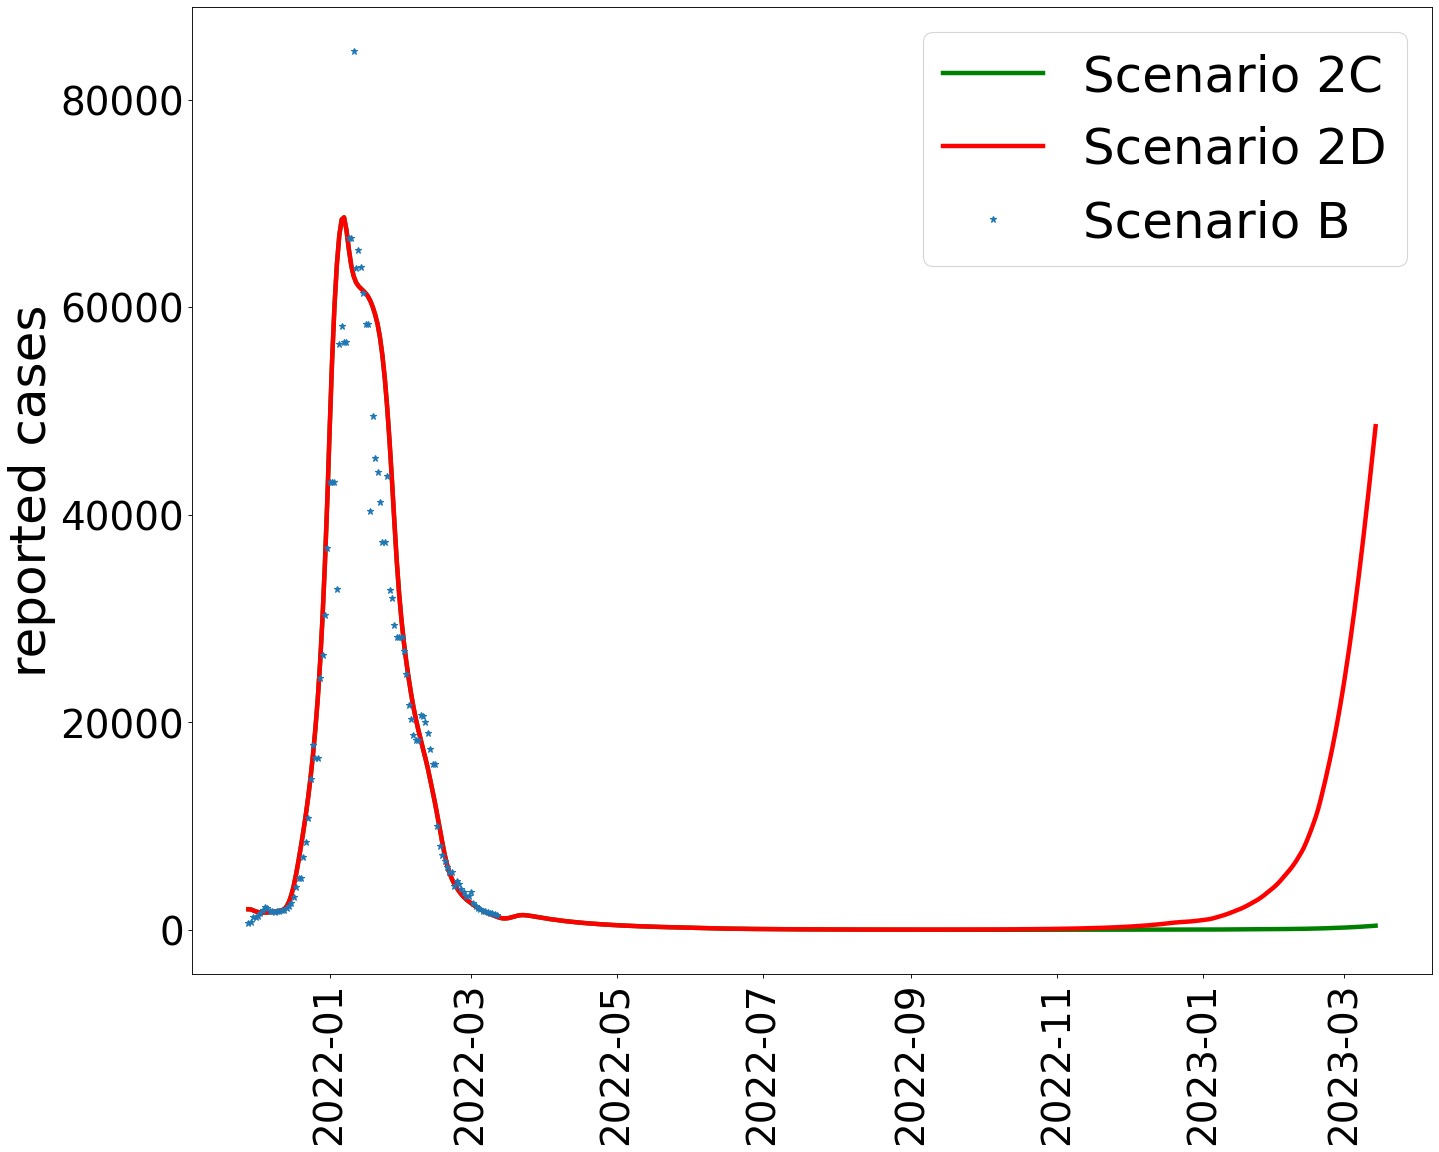

In [1014]:
import matplotlib.dates as mdates


drange1 = pd.date_range("2021-11-28", periods=472, freq="1D")
drange2 = pd.date_range("2021-11-28", periods=105, freq="1D")

fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, I_ov_avg, 'g', label = 'Scenario 2C', lw =4)
plt.plot(drange1, I_ov_avg2, 'r', label = 'Scenario 2D', lw =4)


plt.plot(drange2, case_avg, '*', label = 'Scenario B', lw =4)



#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)


plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

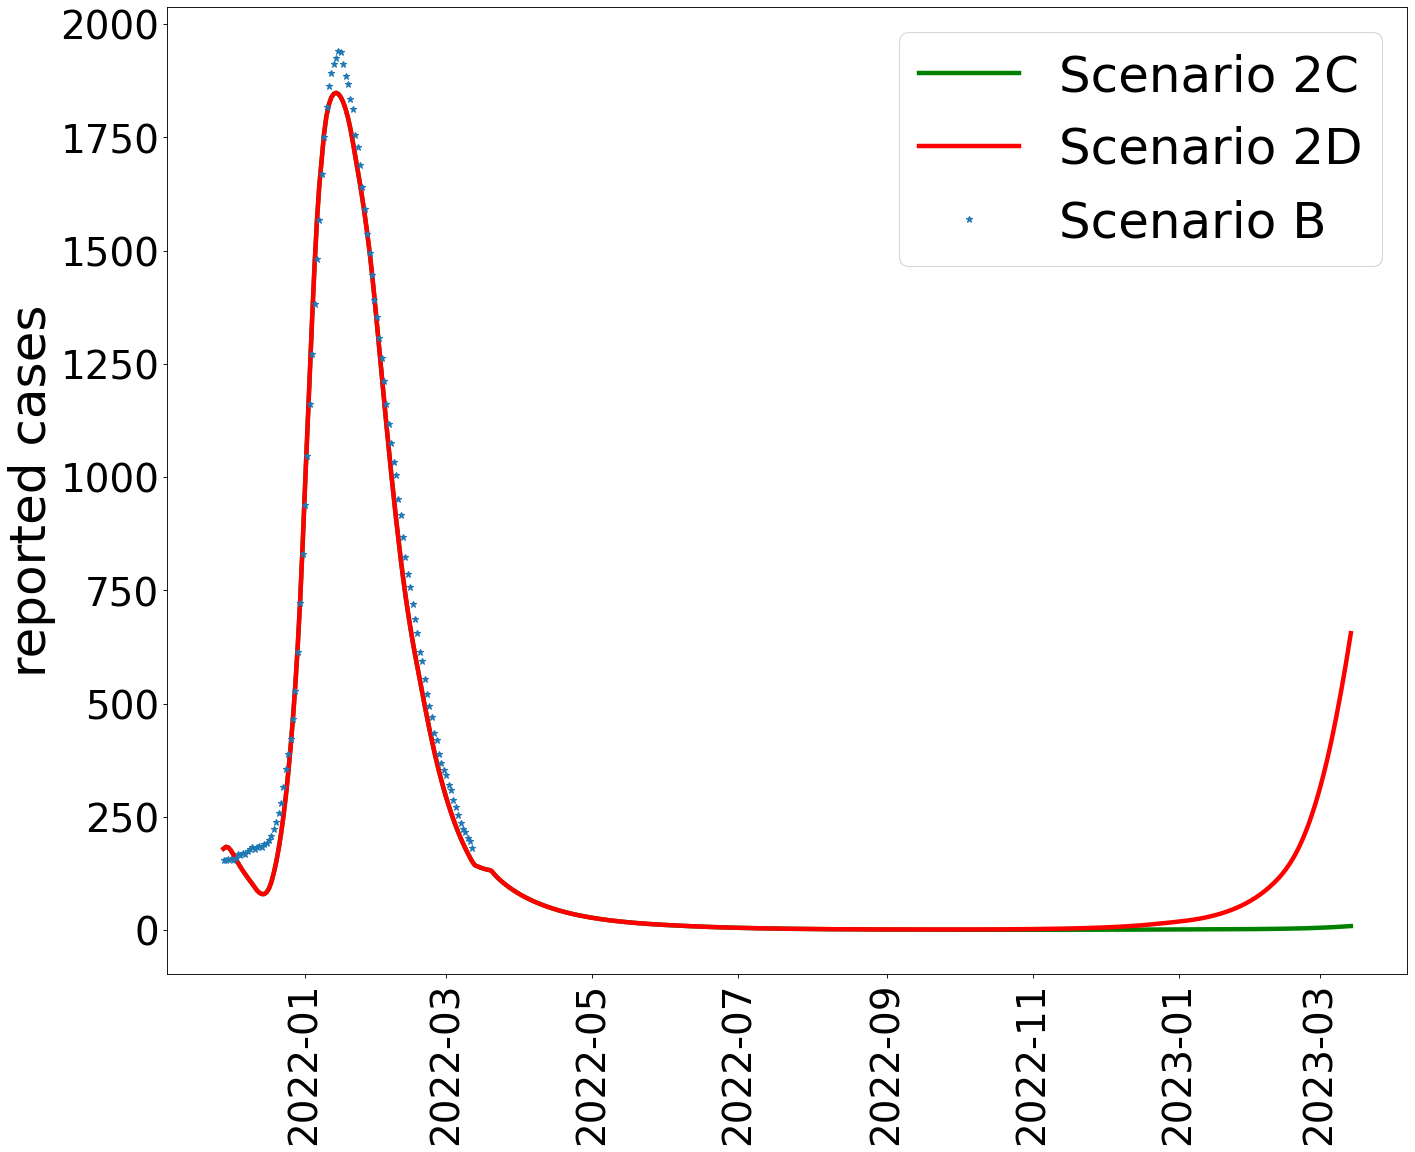

In [1015]:
import matplotlib.dates as mdates


drange1 = pd.date_range("2021-11-28", periods=472, freq="1D")
drange2 = pd.date_range("2021-11-28", periods=105, freq="1D")

fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg, 'g', label = 'Scenario 2C', lw =4)
plt.plot(drange1, H_ov_avg2, 'r', label = 'Scenario 2D', lw =4)


plt.plot(drange2, hosp_avg, '*', label = 'Scenario B', lw =4)



#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)


plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

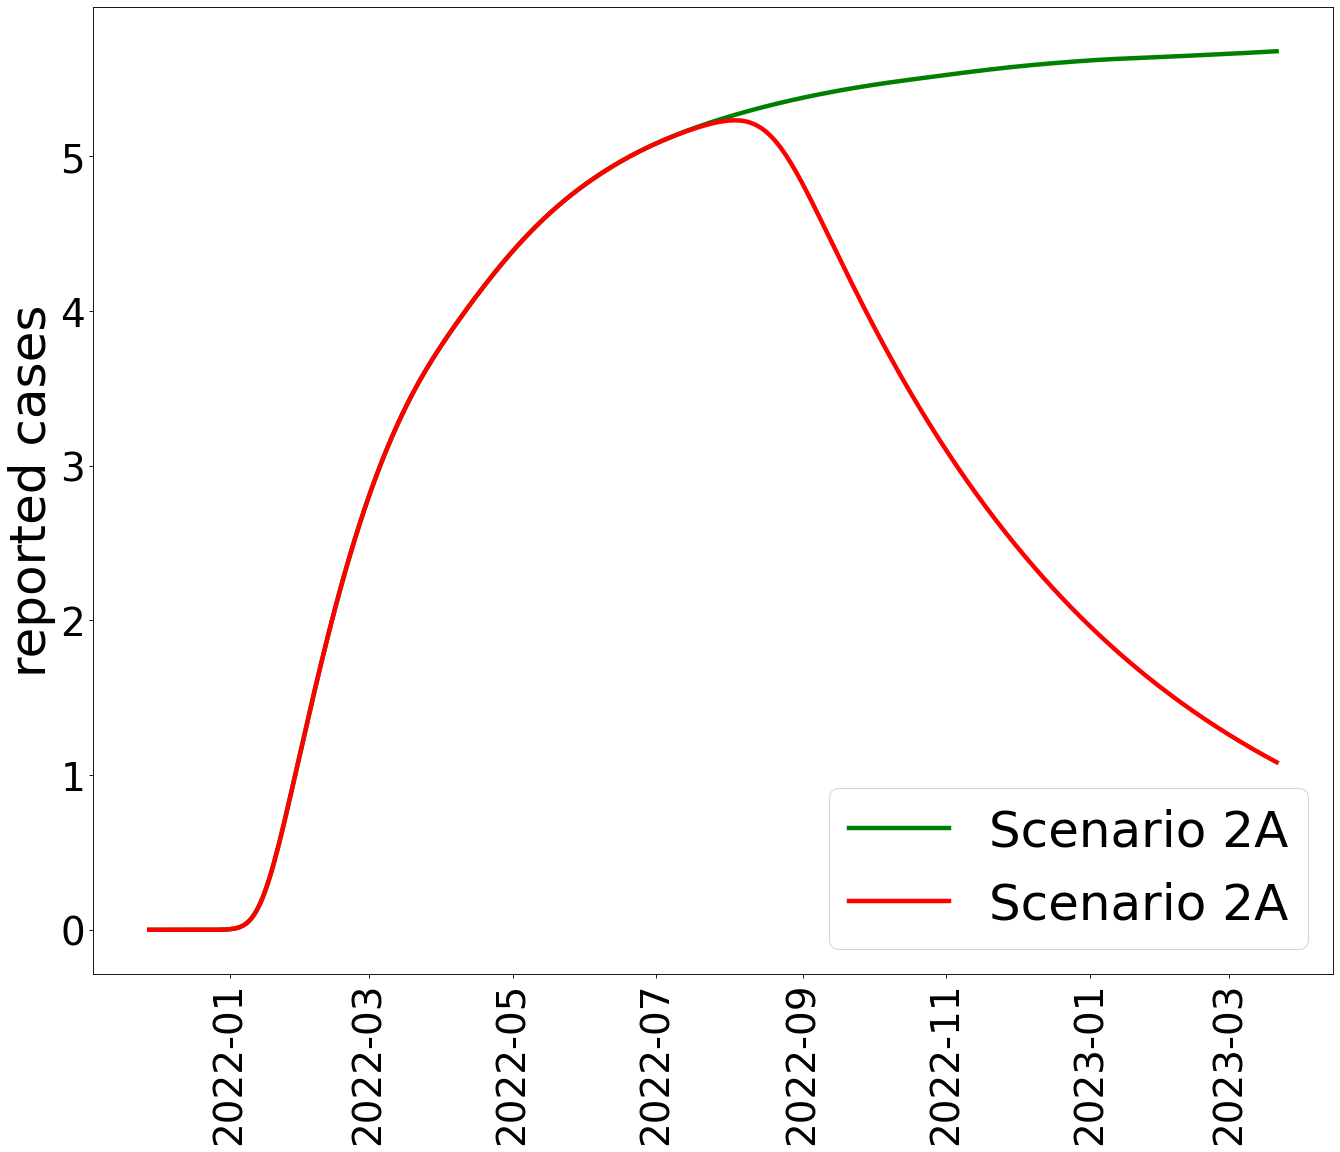

In [612]:
drange1 = pd.date_range("2021-11-28", periods=479, freq="1D")
drange2 = pd.date_range("2021-11-28", periods=105, freq="1D")

fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, M2_ovv, 'g', label = 'Scenario 2A', lw =4)
plt.plot(drange1, M2_ovv2, 'r', label = 'Scenario 2A', lw =4)


#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)


plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

In [1016]:
def simulation_st2(x, sc1, sc2, sc3, sc4, std):
    Nd = 490
    dt = 0.25  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = np.zeros([6, ])
    M2 = np.zeros([6, ])
    M3 = np.zeros([6, ])
    M22 = np.zeros([6, ])
    MX = np.zeros([6, ])
    
    Mh = np.zeros([6, ])
    Mh2 = np.zeros([6, ])
    Mh3 = np.zeros([6, ])
    Mh22 = np.zeros([6, ])
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w1 = 0.9/(4*30)
        w11 = 0.9/(4*30)
        w3 = 0.9/(4*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w1 = 0.5/(10*30)
        w11 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        
    
    D0 = [149/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):

        if (count < 440):
            if (sc1 == 0):
                prev = 0
            else:    
                prev = prev2[count]
        
            if (sc2 == 0):
                prevv = 0
            else:
                prevv = prev3[count]
                
        
            
        if (tt*dt < 21):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 21 and tt*dt < 41):
            bita = x01/N
            yx = y1 + (tt*dt-21)*(y2 - y1)/30
            zx = z1 + (tt*dt-21)*(z2 - z1)/30

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20        
            
        if (tt*dt >= 81 and tt*dt < 112):
            bita = x04/N
            yx = y4 + (tt*dt-81)*(y5 - y4)/20
            zx = z4 + (tt*dt-81)*(z5 - z4)/20       
          
        if (tt*dt >= 112):
            sigma = 0.006
            
            x4 = 1.5*(x04)

            x4 = x4 + np.random.normal(0, std, 1)
            if (sc1 ==0):
                bita = (1+0.0)*x4/N
                pp = 1
            if (sc1 ==1):
                bita = (1+prev*0.55)*x4/N
                pp = 1.55
            if (sc1 ==2):
                bita = (1+prev*0.5)*x4/N
                pp = 1.5
            if (sc1 == 3):
                bita = x4/N
                pp = 1
            if (sc1 == 4):
                bita = (1 - prev*0.2)*x4/N
                pp = 0.8
            #yx = (y3 + y4 + y5 + y2)/4
            yx = 1.5*y5
            #yx = y5
            #zx = 1*z5    
            zx = 1*z5
            
           
        pp = 0     
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        if (sc1 == 0):
            esc = 0.0
            esc2 = 0.0       
        if (sc1 == 1):
            esc = 0.45
            esc2 = 0.32
        if (sc1 == 2):
            esc = 0.10
            esc2 = 0.0
        if (sc1 == 3):
            esc = 0.85
            esc2 = 0.32  
        if (sc1 == 4):
            esc = 0.5
            esc2 = 0.0  
            
        esc3 = 0.3
            
        yx = yx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev*0.33)*(1+38*M[i]*(1-prev*esc2) + 19*M2[i]*(1-prev*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        KK1_1 = 3*(1-prev*esc)
        KK2_1 = 18*(1-prev*esc2)*(1- prev*12.34/18)
        KK3_1 = 38*(1-prev*esc2)*(1- prev*(38-12.33)/38)
        KK1_2 = 1.3333*(1-prev*esc)
        KK2_2 = 8*(1-prev*esc2)*(1- prev*(8-5.66)/8)
        KK3_2 = 18*(1-prev*esc2)*(1- prev*(18-12.33)/18)

        Kex = 0.25*(1-prev*esc)
        Kex2 = 0.35*(1-prev*esc)
        Kex4 = 0.35*(1-prev*esc)
        
        K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
        K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
        K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death   

        
        Kex3 = 0.35*(1-(1-prev)*esc)
        K1_1 = 4*(1-(1-prev)*esc)*(1-prevv*esc3)
        K2_1 = 19*(1-(1-prev)*esc2)
        K3_1 = 38*(1-(1-prev)*(esc2-0.1))
        K1_2 = 4*(1-(1-prev)*esc)*(1-prevv*esc3)
        K2_2 = 19*(1-(1-prev)*esc2)
        K3_2 = 38*(1-(1-prev)*(esc2-0.1))
        KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
        KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
        KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2] 
                    
                     
        KKK1_1 = 4*(1-prev*esc)*(1-prevv*esc3)
        KKK2_1 = 19*(1-prev*esc2)
        KKK3_1 = 4*(1-prev*(esc2-0.1))
        KKK1_2 = 19*(1-prev*esc)*(1-prevv*esc3)
        KKK2_2 = 19*(1-prev*esc2)
        KKK3_2 = 38*(1-prev*(esc2-0.1))

        KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
        KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
        KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Kex*M[i]*g_E + 0.25*M22[i]*g_E  + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Kex2*M[i]*g_E + 0.25*M22[i]*g_E + Kex4*M3[i]*g_E + Kex3*M2[i]*g_E + Kex3*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Kex2*M[i]*g_E - 0.25*M22[i]*g_E - Kex4*M3[i]*g_E - Kex3*M2[i]*g_E - Kex3*MX[i]*g_E, 0)
                
                if (sc2 == 1):
                    S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - infl[count]*N/(329e6) + ww*R[i]) + S_g
                    E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + infl[count]*N/(329e6) - g_E*E[i])  + E_g
                else:
                    S_new[i] = S[i] + dt*(-(bita/(1 + K1[i]*M[i] + K1[i]*M22[i] + KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                    E_new[i] = E[i] + dt*((bita/(1 + K1[i]*M[i] + K1[i]*M22[i] +  KK1[i]*M2[i] + KK1[i]*MX[i]*(1-prevv*esc3) + KKK1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*MXh[i] + KK2[i]*Mh2[i] + KKK2[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2[i]*Mh[i] + K2[i]*Mh22[i] + KK2[i]*Mh2[i] + KK2[i]*MXh[i] + KKK2[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3[i]*Mh[i] + K3[i]*Mh22[i] + KK3[i]*Mh2[i] + KK3[i]*MXh[i] + KKK3[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        M_new[i] = M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) + M_g
                        M22_new[i] = M22[i] + dt*(- w11*M22[i] + k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        M3_new[i] = M3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev)*esc)) - w2*M3[i]) + M3_g
                        M2_new[i] = M2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + 0.5*KM*M2[i] + 0.5*KM*MXh[i]) - w3*M2[i]) + M2_g
                        MX_new[i] = MX[i] + dt*(0.3*k3*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + KM*M2[i]*(1-prevv*esc3) + KM*MXh[i]*(1-prevv*esc3)) - w3*MX[i]) + M2_g
                        
                        
                        Mh_new[i] = Mh[i] + dt*(k1*vacc_1[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i]))
                        Mh22_new[i] = Mh22[i] + dt*(k2*vacc_2[i, count]/(1 + 0.5*KM*M[i] + 0.5*KM*M22[i])) 
                        Mh3_new[i] = Mh3[i] + dt*(k3*(1-prev)*R[i]/(1 + 0.1*KM*M[i] + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev)*esc)))
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev*(1-prevv)*R[i]/(1 + 0.1*KM*Mh[i]*(1-prev*esc) + KM*Mh3[i]*(1-prev*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i])) 
                        MXh_new[i] = MXh[i] + dt*(0.3*k3*prevv*R[i]/(1 + 0.1*KM*M[i]*(1-prev*esc) + KM*M3[i]*(1-prev*esc) + KM*M2[i]*(1-prevv*esc3) + KM*MXh[i]*(1-prevv*esc3)))

        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = M[i]*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(M)
            M2_ovv[count] = np.sum(M2)
            M3_ovv[count] = np.sum(M3)
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
        
    peak_d_D = 0
    peak_d_H = 0
    peak_d_I = 0
        
    I_ov_avg = np.zeros([53, ])
    D_ov_avg = np.zeros([53, ])
    H_ov_avg = np.zeros([53, ])
    for i in range(53):
        
        new_case[i] = np.sum(D2_ova[115 + 7*i:115 + i*7 + 7])
        new_hosp[i] = np.sum(H_ova[115 + 7*i:115 + i*7 + 7])
        new_death[i] = np.sum(D3_ova[115 + 7*i:115 + i*7 + 7])
        
        cum_case[i] = np.sum(Ic_ov[115 + 7*i:115 + i*7 + 7])
        cum_hosp[i] = np.sum(hosp_cc[115 + 7*i:115 + i*7 + 7])
        cum_death[i] = np.sum(D_ov[115 + 7*i:115 + i*7 + 7])
        """
        I_ov_avg[i] = D2_ova[i+7]
        D_ov_avg[i] = D3_ova[i+7]
        H_ov_avg[i] = H_ova[i+7]
        """
    return new_case, new_hosp, new_death, cum_case, cum_hosp, cum_death


In [401]:
new_case, new_hosp, new_death, cum_case, cum_hosp, cum_death = simulation_st2(0, 1, 1, 0, 0, 259730)

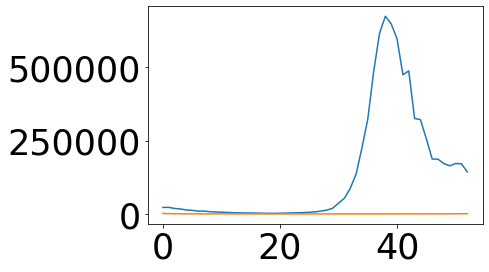

In [402]:
plt.plot(new_case)
plt.plot(new_hosp_CA_B[:,4])

In [185]:
np.shape(new_hosp)

(56,)

In [1017]:
new_case_FL_D = np.zeros([53, 200])
new_hosp_FL_D = np.zeros([53, 200])
new_death_FL_D = np.zeros([53, 200])
cum_case_FL_D = np.zeros([53, 200])
cum_hosp_FL_D = np.zeros([53, 200])
cum_death_FL_D = np.zeros([53, 200])

for i in range(200):
    new_case_FL_D[:,i], new_hosp_FL_D[:,i], new_death_FL_D[:,i], cum_case_FL_D[:,i], cum_hosp_FL_D[:,i], cum_death_FL_D[:,i] = simulation_st2(0, 1, 1, 0, 0, 159730)

In [1018]:
new_case_FL_D_p = np.zeros([53, 25])
new_hosp_FL_D_p = np.zeros([53, 25])
new_death_FL_D_p = np.zeros([53, 25])
cum_case_FL_D_p = np.zeros([53, 25])
cum_hosp_FL_D_p = np.zeros([53, 25])
cum_death_FL_D_p = np.zeros([53, 25])


for i in range(53):
    new_case_FL_D_p[i,:] = np.percentile(new_case_FL_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    new_hosp_FL_D_p[i,:] = np.percentile(new_hosp_FL_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    new_death_FL_D_p[i,:] = np.percentile(new_death_FL_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    
    cum_case_FL_D_p[i,:] = np.percentile(cum_case_FL_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    cum_hosp_FL_D_p[i,:] = np.percentile(cum_hosp_FL_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    cum_death_FL_D_p[i,:] = np.percentile(cum_death_FL_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    

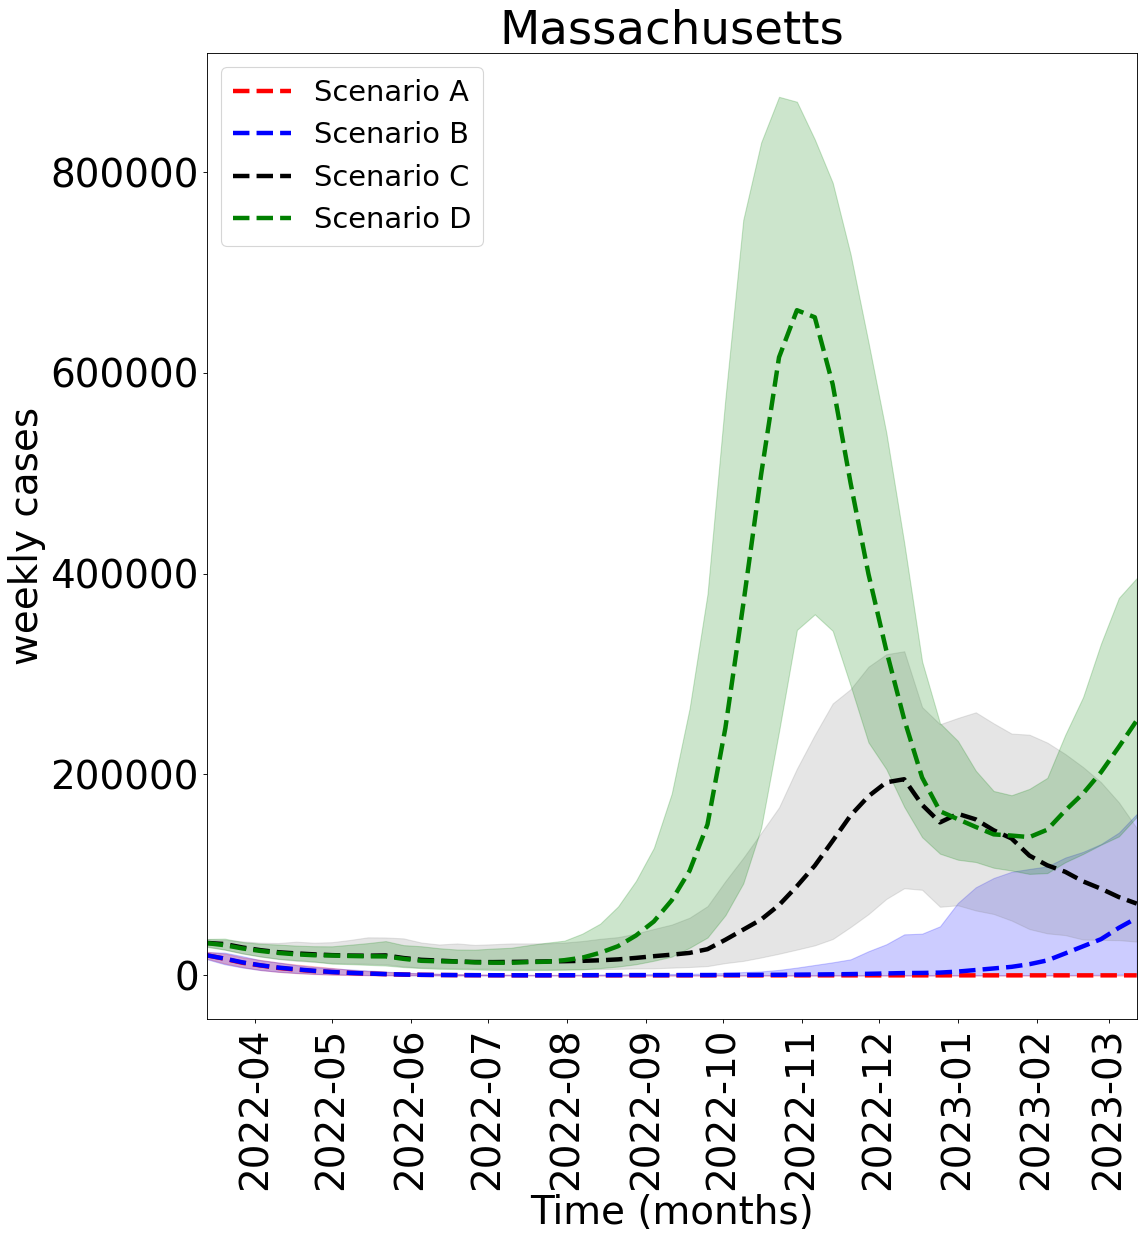

In [996]:
import matplotlib.dates as mdates

drange2 = pd.date_range("2021-08-20", periods=21, freq="7D")
drange1 = pd.date_range("2022-03-13", periods=53, freq="7D")

#D2_ova = new_to_active(D_ov[:,0])
#D2_ova2 = new_to_active(D_ov3)

    #vaccination

fig = plt.figure(num=None, figsize=(15, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

#plt.plot(drange, (cases['cases_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['cases_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  


plt.fill_between(drange1, new_case_CA_A_p[:,2], new_case_CA_A_p[:,21], color='red', alpha=0.2)
plt.plot(drange1, new_case_CA_A_p[:,12], '--', color='red',  lw=4, label = 'Scenario A')


plt.fill_between(drange1, new_case_CA_B_p[:,2], new_case_CA_B_p[:,21], color='blue', alpha=0.2)
plt.plot(drange1, new_case_CA_B_p[:,12], '--', color='blue',  lw=4, label = 'Scenario B')


plt.fill_between(drange1, new_case_CA_C_p[:,2], new_case_CA_C_p[:,21], color='gray', alpha=0.2)
plt.plot(drange1, new_case_CA_C_p[:,12], '--', color='black',  lw=4, label = 'Scenario C')


plt.fill_between(drange1, new_case_CA_D_p[:,2], new_case_CA_D_p[:,21], color='green', alpha=0.2)
plt.plot(drange1, new_case_CA_D_p[:,12], '--', color='green',  lw=4, label = 'Scenario D')


#plt.plot(drange2, 7*case_avg, 'r*', markersize=12)

#plt.plot(drange1, D2_ova2/US_N, '-', color='red', label='USA', lw=2)


#plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
#plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)
plt.ylabel('weekly cases')
plt.xlabel('Time (months)')
plt.title('Massachusetts')
#plt.plot(drange2, case_avg1, 'r*')
plt.legend(fontsize=26, loc = 2);
plt.autoscale(enable=True, axis='x', tight=True)

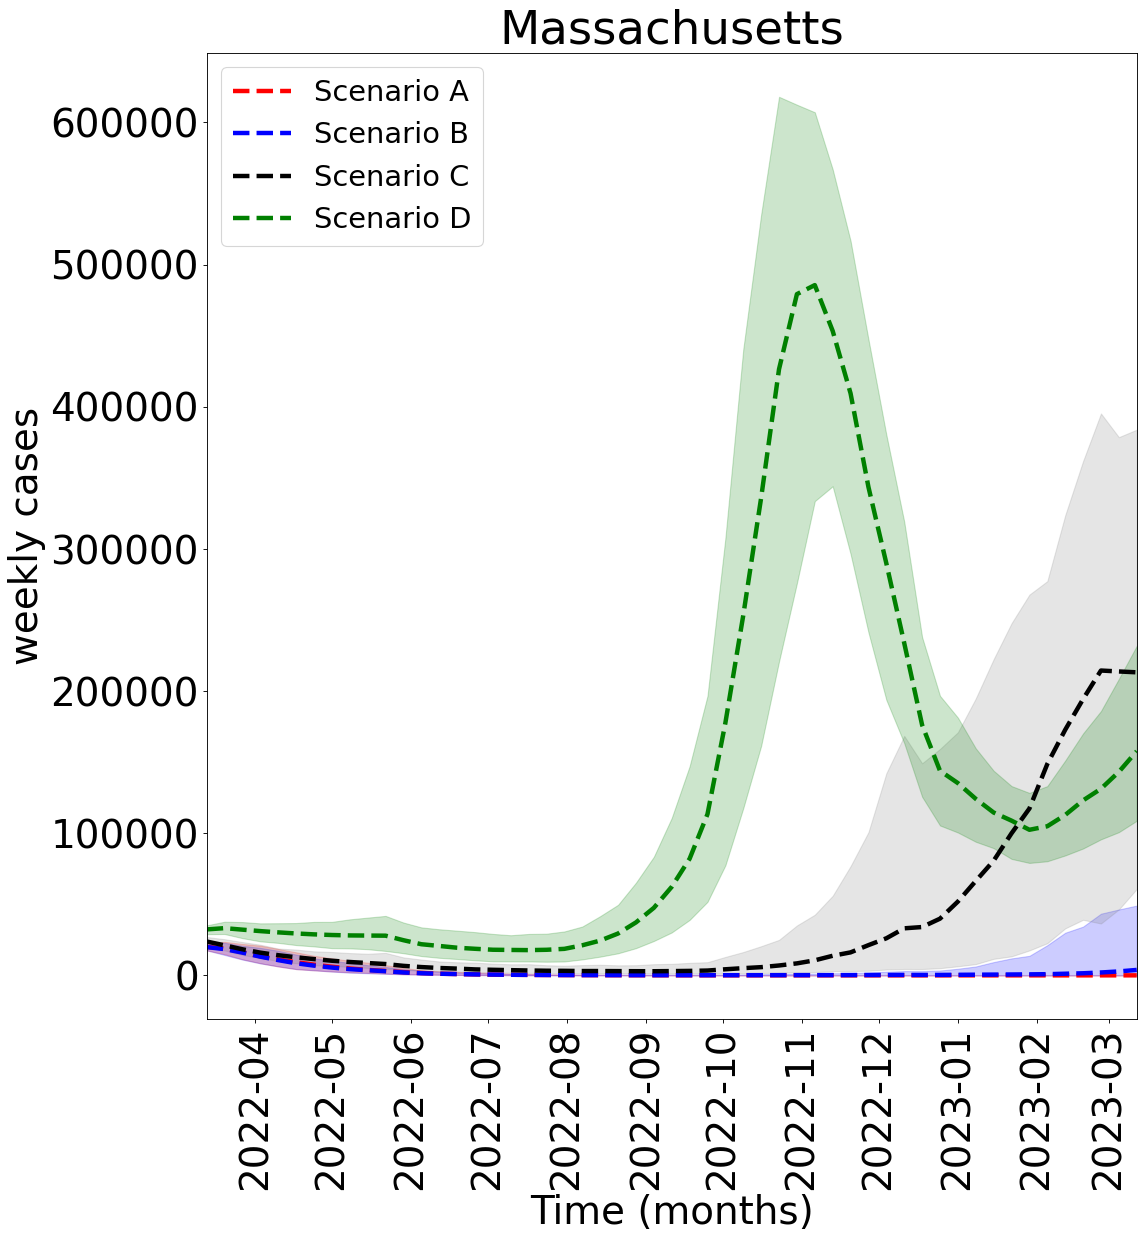

In [519]:
import matplotlib.dates as mdates

drange2 = pd.date_range("2021-08-20", periods=21, freq="7D")
drange1 = pd.date_range("2022-03-13", periods=53, freq="7D")

#D2_ova = new_to_active(D_ov[:,0])
#D2_ova2 = new_to_active(D_ov3)

    #vaccination

fig = plt.figure(num=None, figsize=(15, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

#plt.plot(drange, (cases['cases_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['cases_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  


plt.fill_between(drange1, new_case_TX_A_p[:,2], new_case_TX_A_p[:,21], color='red', alpha=0.2)
plt.plot(drange1, new_case_TX_A_p[:,12], '--', color='red',  lw=4, label = 'Scenario A')


plt.fill_between(drange1, new_case_TX_B_p[:,2], new_case_TX_B_p[:,21], color='blue', alpha=0.2)
plt.plot(drange1, new_case_TX_B_p[:,12], '--', color='blue',  lw=4, label = 'Scenario B')


plt.fill_between(drange1, new_case_TX_C_p[:,2], new_case_TX_C_p[:,21], color='gray', alpha=0.2)
plt.plot(drange1, new_case_TX_C_p[:,12], '--', color='black',  lw=4, label = 'Scenario C')


plt.fill_between(drange1, new_case_TX_D_p[:,2], new_case_TX_D_p[:,21], color='green', alpha=0.2)
plt.plot(drange1, new_case_TX_D_p[:,12], '--', color='green',  lw=4, label = 'Scenario D')


#plt.plot(drange2, 7*case_avg, 'r*', markersize=12)

#plt.plot(drange1, D2_ova2/US_N, '-', color='red', label='USA', lw=2)


#plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
#plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)
plt.ylabel('weekly cases')
plt.xlabel('Time (months)')
plt.title('Massachusetts')
#plt.plot(drange2, case_avg1, 'r*')
plt.legend(fontsize=26, loc = 2);
plt.autoscale(enable=True, axis='x', tight=True)

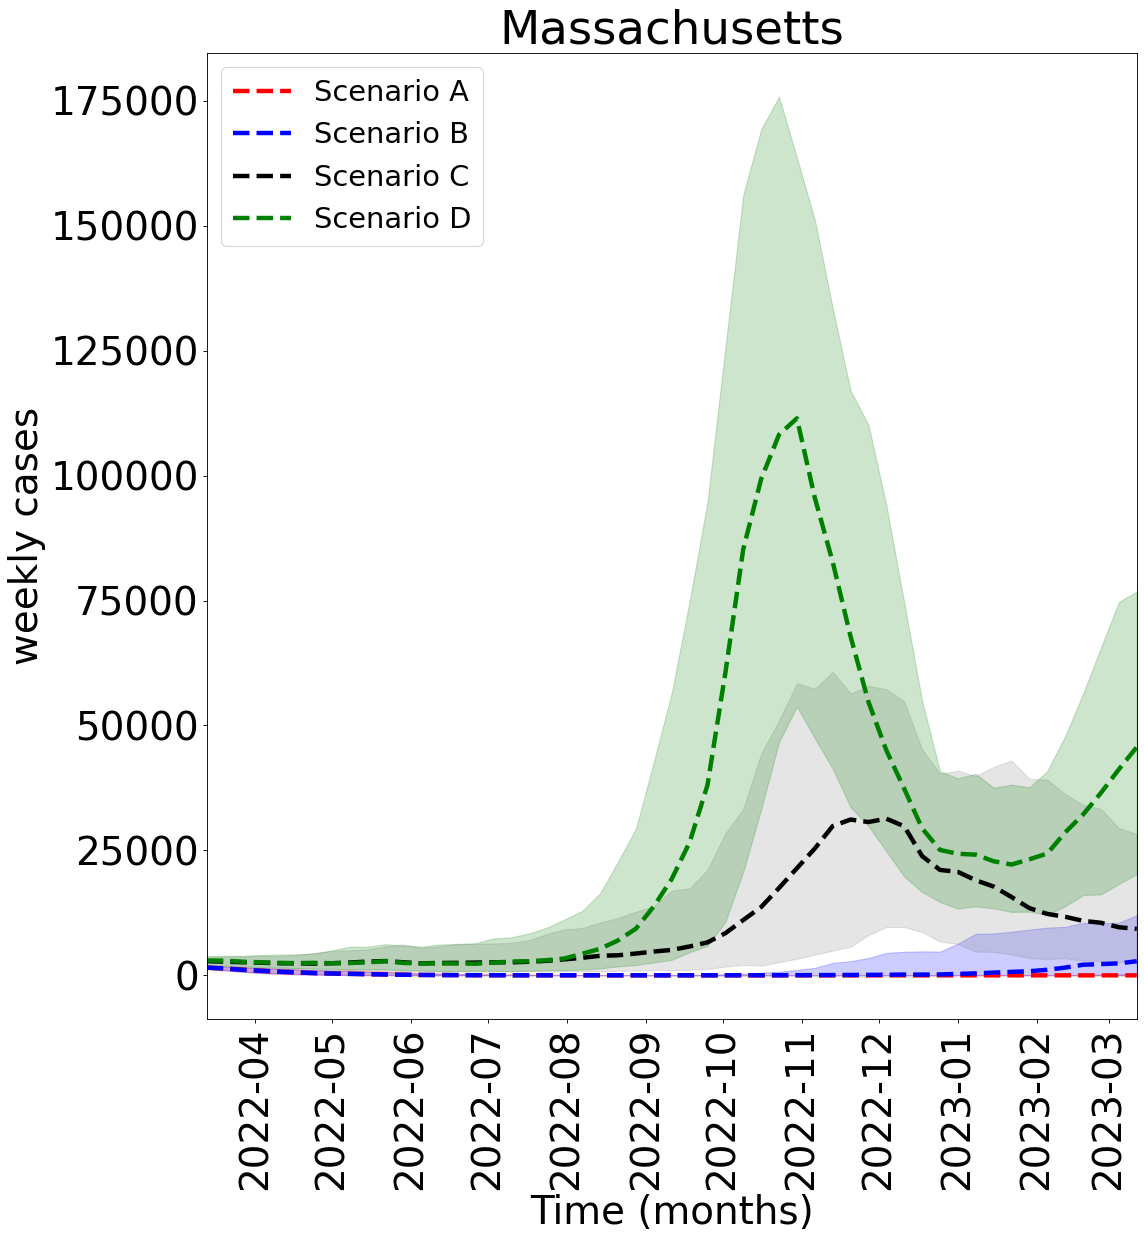

In [785]:
import matplotlib.dates as mdates

drange2 = pd.date_range("2021-08-20", periods=21, freq="7D")
drange1 = pd.date_range("2022-03-13", periods=53, freq="7D")

#D2_ova = new_to_active(D_ov[:,0])
#D2_ova2 = new_to_active(D_ov3)

    #vaccination

fig = plt.figure(num=None, figsize=(15, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

#plt.plot(drange, (cases['cases_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['cases_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  


plt.fill_between(drange1, new_case_MA_A_p[:,2], new_case_MA_A_p[:,21], color='red', alpha=0.2)
plt.plot(drange1, new_case_MA_A_p[:,12], '--', color='red',  lw=4, label = 'Scenario A')


plt.fill_between(drange1, new_case_MA_B_p[:,2], new_case_MA_B_p[:,21], color='blue', alpha=0.2)
plt.plot(drange1, new_case_MA_B_p[:,12], '--', color='blue',  lw=4, label = 'Scenario B')


plt.fill_between(drange1, new_case_MA_C_p[:,2], new_case_MA_C_p[:,21], color='gray', alpha=0.2)
plt.plot(drange1, new_case_MA_C_p[:,12], '--', color='black',  lw=4, label = 'Scenario C')


plt.fill_between(drange1, new_case_MA_D_p[:,2], new_case_MA_D_p[:,21], color='green', alpha=0.2)
plt.plot(drange1, new_case_MA_D_p[:,12], '--', color='green',  lw=4, label = 'Scenario D')


#plt.plot(drange2, 7*case_avg, 'r*', markersize=12)

#plt.plot(drange1, D2_ova2/US_N, '-', color='red', label='USA', lw=2)


#plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
#plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)
plt.ylabel('weekly cases')
plt.xlabel('Time (months)')
plt.title('Massachusetts')
#plt.plot(drange2, case_avg1, 'r*')
plt.legend(fontsize=26, loc = 2);
plt.autoscale(enable=True, axis='x', tight=True)

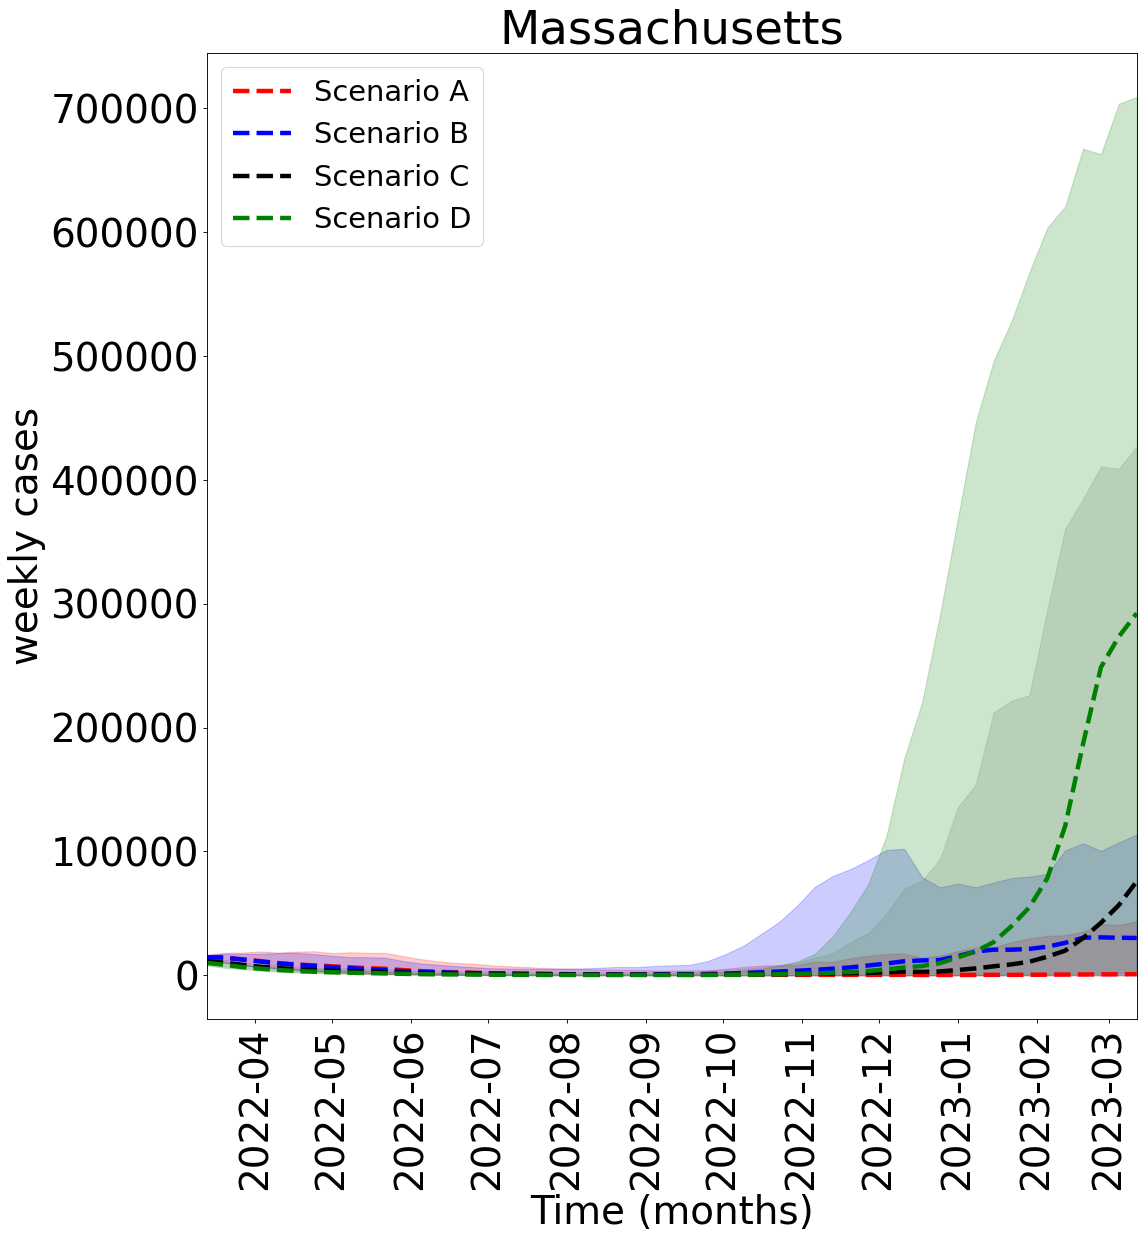

In [1022]:
import matplotlib.dates as mdates

drange2 = pd.date_range("2021-08-20", periods=21, freq="7D")
drange1 = pd.date_range("2022-03-13", periods=53, freq="7D")

#D2_ova = new_to_active(D_ov[:,0])
#D2_ova2 = new_to_active(D_ov3)

    #vaccination

fig = plt.figure(num=None, figsize=(15, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})

#plt.plot(drange, (cases['cases_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['cases_d_avg']), 'r*', label = 'reported data')


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  


plt.fill_between(drange1, new_case_FL_A_p[:,2], new_case_FL_A_p[:,21], color='red', alpha=0.2)
plt.plot(drange1, new_case_FL_A_p[:,12], '--', color='red',  lw=4, label = 'Scenario A')


plt.fill_between(drange1, new_case_FL_B_p[:,2], new_case_FL_B_p[:,21], color='blue', alpha=0.2)
plt.plot(drange1, new_case_FL_B_p[:,12], '--', color='blue',  lw=4, label = 'Scenario B')


plt.fill_between(drange1, new_case_FL_C_p[:,2], new_case_FL_C_p[:,21], color='gray', alpha=0.2)
plt.plot(drange1, new_case_FL_C_p[:,12], '--', color='black',  lw=4, label = 'Scenario C')


plt.fill_between(drange1, new_case_FL_D_p[:,2], new_case_FL_D_p[:,21], color='green', alpha=0.2)
plt.plot(drange1, new_case_FL_D_p[:,12], '--', color='green',  lw=4, label = 'Scenario D')


#plt.plot(drange2, 7*case_avg, 'r*', markersize=12)

#plt.plot(drange1, D2_ova2/US_N, '-', color='red', label='USA', lw=2)


#plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
#plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)
plt.ylabel('weekly cases')
plt.xlabel('Time (months)')
plt.title('Massachusetts')
#plt.plot(drange2, case_avg1, 'r*')
plt.legend(fontsize=26, loc = 2);
plt.autoscale(enable=True, axis='x', tight=True)

In [237]:
date_sc = pd.read_excel('vax\\scenario_date.xlsx')
date_1 = date_sc['date'].squeeze()
date_2 = date_sc['date2'].squeeze()

date_1_str = date_1.dt.strftime('%Y-%m-%d')
date_2_str = date_2.dt.strftime('%Y-%m-%d')


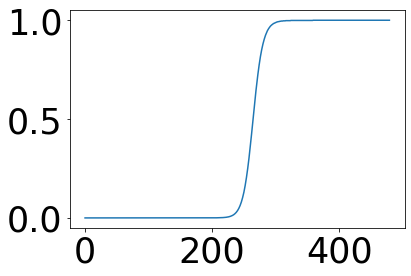

In [659]:
plt.plot(prev3)

In [239]:
quantiles = [0, 0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.975, 0.99, 1]

In [246]:
def new_to_cum(inc):
    cum = np.zeros([53, ])
    a = 0
    for i in range(53):
        a = a + max(inc[i], 0)
        cum[i] = a
    return cum

In [1027]:
FL_D = pd.DataFrame(columns = ['model_projection_date', 'scenario_name', 'scenario_id', 'target', 'target_end_date', 'location', 'type', 'quantile', 'value'])
location = '12'
state = 'DD'
if (state == 'CC'):
    sc_name = 'pessWan_noVar'
    sc_id = 'C-2022-02-25'
elif (state == 'DD'):
    sc_name = 'pessWan_Var'
    sc_id = 'D-2022-02-25'
elif (state == 'AA'):
    sc_name = 'optWan_noVar'
    sc_id = 'A-2022-02-25'
elif (state == 'BB'):
    sc_name = 'optWan_Var'
    sc_id = 'B-2022-02-25'
for i in range(53): 
    date1 = date_1_str[i]
    date2 = date_2_str[i]
    
    case_old = 5824728

    death_old = 71860
    
    target = str(i + 1) + " wk ahead inc death"
    
    ty = 'quantile'
    
    for j in range(25):
        quant = quantiles[j]
        value = max(new_death_FL_D_p[i,j], 0)
        
        FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
            ignore_index = True)
        
    target = str(i + 1) + " wk ahead cum death"
    
    for j in range(25):
        quant = quantiles[j]
        cum = new_to_cum(new_death_FL_D_p[:,j])
        value = death_old + cum[i]
        print(value)
        
        FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
            ignore_index = True)
        
        
    target = str(i + 1) + " wk ahead inc case"
    
    for j in range(25):
        quant = quantiles[j]
        value = max(new_case_FL_D_p[i,j], 0)
        
        FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
            ignore_index = True)
        
    target = str(i + 1) + " wk ahead cum case"
    
    for j in range(25):
        quant = quantiles[j]
        cum = new_to_cum(new_case_FL_D_p[:,j])
        value = case_old + cum[i]
        
        FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
            ignore_index = True)
        
    target = str(i + 1) + " wk ahead inc hosp"
    
    for j in range(25):
        quant = quantiles[j]
        value = max(new_hosp_FL_D_p[i,j], 0)
        
        FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
            ignore_index = True)
        
    target = str(i + 1) + " wk ahead cum hosp"
    
    for j in range(25):
        quant = quantiles[j]
        cum =  new_to_cum(new_hosp_FL_D_p[:,j])
        value = cum[i]
        
        FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
            ignore_index = True)
        
        
    ty = 'point'
    
    target = str(i + 1) + " wk ahead inc death"
    
    
    quant = 'NA'
    value = new_death_FL_D_p[i,12]
        
    FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
        ignore_index = True)
        
    target = str(i + 1) + " wk ahead cum death"
    
    cum = new_to_cum(new_death_FL_D_p[:,12])
    value = death_old + cum[i]
    

        
    FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
        ignore_index = True)
        
        
    target = str(i + 1) + " wk ahead inc case"
    
    
    value = new_case_FL_D_p[i,12]
        
    FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
        ignore_index = True)
        
    target = str(i + 1) + " wk ahead cum case"
    
    
    cum = new_to_cum(new_case_FL_D_p[:,12])
    value = case_old + cum[i]
        
    FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
        ignore_index = True)
        
    target = str(i + 1) + " wk ahead inc hosp"
    
    
    value = new_hosp_FL_D_p[i,12]
        
    FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
        ignore_index = True)
        
    target = str(i + 1) + " wk ahead cum hosp"
    
    
    cum =  new_to_cum(new_hosp_FL_D_p[:,12])
    value = cum[i]
        
    FL_D = FL_D.append({'model_projection_date' : date1, 'scenario_name' : sc_name, 'scenario_id' : sc_id, 'target' : target, 'target_end_date' : date2, 'location' : location, 'type' : ty, 'quantile' : quant, 'value' : value}, 
        ignore_index = True)
    
    

72529.2817876788
72532.323886553
72535.00803709778
72536.15103902062
72539.50449326838
72542.5028782147
72544.49503371342
72546.2266969292
72547.86100144945
72548.87410296842
72550.33014045343
72551.53439333595
72553.61799585457
72554.74661229448
72555.98629379715
72557.12964016393
72558.357118733
72560.19343711759
72561.79711818478
72564.93510265858
72567.98806103964
72572.9717540462
72574.74193658444
72576.3814212743
72583.08745516598
73088.93850761058
73094.63916104264
73102.42589712828
73105.821529891
73114.18657424496
73119.94182266518
73124.68502896119
73128.86207508575
73133.35407904169
73136.41429033256
73139.27343858498
73141.75368722911
73145.53635224637
73148.26212731445
73150.866018707
73153.1318035937
73155.78770175316
73160.59568757126
73164.034031393
73169.76711756739
73174.8662757134
73185.31452471572
73192.00713125854
73194.90533074479
73205.17172199316
73555.78699346856
73569.68561253432
73582.1055648946
73588.70933548173
73599.93873891808
73610.77157565138
73618.6053

75946.71809631176
76004.33447362827
76045.72530473517
76093.65346922808
76146.55632560585
76186.84876355038
76215.9035647906
76243.47597433739
76270.61667347889
76292.17772116323
76311.55797533818
76332.32949679012
76355.40563144992
76374.78011275534
76395.23730400155
76414.101887846
76438.55137202496
76463.22969146876
76488.79423392948
76521.47079173944
76561.87575885099
76630.23001113407
76685.01483702836
76726.22361776845
76812.90070483387
75967.96054042174
76026.00751376845
76067.47012924177
76115.73345910496
76169.54692473746
76210.52165605352
76239.85858545841
76268.02033144329
76295.51390271055
76317.54726271571
76337.20921632863
76358.36710843995
76381.68989713835
76401.47046802528
76422.4498955639
76441.60468764843
76466.28899877658
76491.69659545513
76518.0646722851
76551.36198590905
76593.07834769839
76663.40255723271
76720.1592208281
76763.67554248293
76852.1360076735
75985.67969824267
76043.79338839004
76085.40836081741
76134.06494608453
76188.77889405198
76230.22415855937

76063.14794867992
76123.48868017206
76167.9406781553
76219.04321182756
76279.08719619297
76325.30162475366
76358.33251011262
76389.65864302254
76420.7343729109
76446.10457611208
76470.03047165493
76495.02993645644
76524.25115375716
76550.4536437439
76580.25055396109
76607.93786880495
76642.1091897022
76679.12371280404
76720.49909236563
76776.14935344105
76861.66241930795
76994.16558424638
77180.52412936167
77444.66545494135
77811.1572651807
76063.82678967423
76124.2407979148
76168.93378756248
76220.17215784274
76280.47672349548
76327.04452931818
76360.39218876479
76392.06845575763
76423.52715257478
76449.21870861185
76473.91480790921
76499.91837186435
76530.09529802308
76557.57509329305
76588.94124022163
76619.37607030173
76656.76823079417
76696.07246400198
76741.47969242328
76803.74671650078
76899.96603126539
77064.82805461297
77319.65237432666
77608.68998521501
78234.4865475981
76064.43813518676
76124.90660027113
76169.85787867707
76221.26000006967
76281.85475625296
76328.87000494565

In [1041]:
CA_D = CA_D.assign(location='06')

In [1038]:
CA_A

,model_projection_date,scenario_name,scenario_id,target,target_end_date,location,type,quantile,value
0,2022-03-13,optWan_noVar,A-2022-02-25,1 wk ahead inc death,2022-03-19,06,quantile,0,8.503300e+02
1,2022-03-13,optWan_noVar,A-2022-02-25,1 wk ahead inc death,2022-03-19,06,quantile,0.01,8.624237e+02
2,2022-03-13,optWan_noVar,A-2022-02-25,1 wk ahead inc death,2022-03-19,06,quantile,0.025,8.645932e+02
3,2022-03-13,optWan_noVar,A-2022-02-25,1 wk ahead inc death,2022-03-19,06,quantile,0.05,8.664696e+02
4,2022-03-13,optWan_noVar,A-2022-02-25,1 wk ahead inc death,2022-03-19,06,quantile,0.1,8.712371e+02
...,...,...,...,...,...,...,...,...,...
8263,2023-03-12,optWan_noVar,A-2022-02-25,53 wk ahead cum death,2023-03-18,06,point,NA,9.391019e+04
8264,2023-03-12,optWan_noVar,A-2022-02-25,53 wk ahead inc case,2023-03-18,06,point,NA,0.000000e+00
8265,2023-03-12,optWan_noVar,A-2022-02-25,53 wk ahead cum case,2023-03-18,06,point,NA,9.122565e+06
8266,2023-03-12,optWan_noVar,A-2022-02-25,53 wk ahead inc hosp,2023-03-18,06,point,NA,1.204535e-07


In [790]:
IL_D

,model_projection_date,scenario_name,scenario_id,target,target_end_date,location,type,quantile,value
0,2022-03-13,pessWan_Var,D-2022-02-25,1 wk ahead inc death,2022-03-19,17,quantile,0,2.043627e+02
1,2022-03-13,pessWan_Var,D-2022-02-25,1 wk ahead inc death,2022-03-19,17,quantile,0.01,2.054688e+02
2,2022-03-13,pessWan_Var,D-2022-02-25,1 wk ahead inc death,2022-03-19,17,quantile,0.025,2.058163e+02
3,2022-03-13,pessWan_Var,D-2022-02-25,1 wk ahead inc death,2022-03-19,17,quantile,0.05,2.074657e+02
4,2022-03-13,pessWan_Var,D-2022-02-25,1 wk ahead inc death,2022-03-19,17,quantile,0.1,2.087154e+02
...,...,...,...,...,...,...,...,...,...
8263,2023-03-12,pessWan_Var,D-2022-02-25,53 wk ahead cum death,2023-03-18,17,point,NA,4.067711e+04
8264,2023-03-12,pessWan_Var,D-2022-02-25,53 wk ahead inc case,2023-03-18,17,point,NA,5.888458e+04
8265,2023-03-12,pessWan_Var,D-2022-02-25,53 wk ahead cum case,2023-03-18,17,point,NA,5.668878e+06
8266,2023-03-12,pessWan_Var,D-2022-02-25,53 wk ahead inc hosp,2023-03-18,17,point,NA,5.141386e+02


In [1048]:
np.savetxt('R13\CA_A.csv', CA_A, delimiter=',', fmt='%s')
np.savetxt('R13\CA_B.csv', CA_B, delimiter=',', fmt='%s')
np.savetxt('R13\CA_C.csv', CA_C, delimiter=',', fmt='%s')
np.savetxt('R13\CA_D.csv', CA_D, delimiter=',', fmt='%s')

In [948]:
np.savetxt('R13\TX_A.csv', TX_A, delimiter=',', fmt='%s')
np.savetxt('R13\TX_B.csv', TX_B, delimiter=',', fmt='%s')
np.savetxt('R13\TX_C.csv', TX_C, delimiter=',', fmt='%s')
np.savetxt('R13\TX_D.csv', TX_D, delimiter=',', fmt='%s')

In [949]:
np.savetxt('R13\MA_A.csv', MA_A, delimiter=',', fmt='%s')
np.savetxt('R13\MA_B.csv', MA_B, delimiter=',', fmt='%s')
np.savetxt('R13\MA_C.csv', MA_C, delimiter=',', fmt='%s')
np.savetxt('R13\MA_D.csv', MA_D, delimiter=',', fmt='%s')

In [950]:
np.savetxt('R13\FL_A.csv', FL_A, delimiter=',', fmt='%s')
np.savetxt('R13\FL_B.csv', FL_B, delimiter=',', fmt='%s')
np.savetxt('R13\FL_C.csv', FL_C, delimiter=',', fmt='%s')
np.savetxt('R13\FL_D.csv', FL_D, delimiter=',', fmt='%s')

In [955]:
np.savetxt(r'R13\NY_A.csv', NY_A, delimiter=',', fmt='%s')
np.savetxt(r'R13\NY_B.csv', NY_B, delimiter=',', fmt='%s')
np.savetxt(r'R13\NY_C.csv', NY_C, delimiter=',', fmt='%s')
np.savetxt(r'R13\NY_D.csv', NY_D, delimiter=',', fmt='%s')

In [956]:
np.savetxt(r'R13\IL_A.csv', IL_A, delimiter=',', fmt='%s')
np.savetxt(r'R13\IL_B.csv', IL_B, delimiter=',', fmt='%s')
np.savetxt(r'R13\IL_C.csv', IL_C, delimiter=',', fmt='%s')
np.savetxt(r'R13\IL_D.csv', IL_D, delimiter=',', fmt='%s')

In [1042]:
file = pd.concat([CA_A, CA_B, CA_C, CA_D, FL_A, FL_B, FL_C, FL_D, TX_A, TX_B, TX_C, TX_D, MA_A, MA_B, MA_C, MA_D, NY_A, NY_B, NY_C, NY_D, IL_A, IL_B, IL_C, IL_D])

In [1043]:
file1 = file.assign(model_projection_date='2022-03-13')

In [1044]:
file1.to_csv('Round13.csv', index=False)